In [ ]:
%matplotlib inline
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Reading the dataset

In [ ]:
filename = "dataset.csv"
df = pd.read_csv(filename)

# Get data in arrays
X = df[['x']].values
y = df.y.values

### Fitting the curve

In [ ]:
#xtrain, xtest, yinter, ytest = train_test_split(x, y, test_size=0.2, random_state=0)
#xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.25, random_state=0)

# kf = KFold(n_splits=5,  random_state=None) 

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index] 
#     y_train, y_test = y[train_index], y[test_index]
        
#Select degree of the curve
degree = 10

#Compute the polynomial features
x = PolynomialFeatures(degree).fit_transform(X)
lreg = LinearRegression()
scores = cross_val_score(lreg, x, y, cv=10, scoring="neg_mean_squared_error")
print(scores)


### Fitting a curve

In [10]:
#Select degree of the curve
degree = 1

#Compute the polynomial features
Xtrain = PolynomialFeatures(degree).fit_transform(xtrain)
Xval = PolynomialFeatures(degree).fit_transform(xval)

#Fit a linear regression model
lreg = LinearRegression()
lreg.fit(Xtrain, ytrain)
scores = cross_validate(lref, X, y, scoring=scoring)

ytrain_pred = lreg.predict(Xtrain)
yval_pred = lreg.predict(Xval)

NameError: name 'xtrain' is not defined

### Plotting the validation curve 

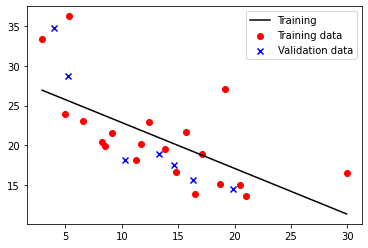

In [7]:
fig, ax = plt.subplots()
ax.scatter(xtrain,ytrain,color='r', marker='o',label="Training data")
ax.scatter(xval,yval,color='b', marker='x',label="Validation data")

#Sort the values to plot the curve 
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xtrain,ytrain_pred), key=sort_axis)
xtrain, ytrain_pred = zip(*sorted_zip)
ax.plot(xtrain,ytrain_pred,color='k', label="Training")
ax.legend()
plt.show()

### Computing the train, validation and test error in terms of MSE

In [8]:
# Select the maximum degree of the polynomial
maxdeg = 16

# Create two empty lists to store training and testing MSEs
training_error, testing_error, validation_error = np.empty((3,maxdeg))

#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    Xtrain = PolynomialFeatures(d).fit_transform(xtrain)
    Xval = PolynomialFeatures(d).fit_transform(xval)
    lreg = LinearRegression()
    lreg.fit(Xtrain, ytrain)
    ytrain_pred = lreg.predict(Xtrain)
    yval_pred = lreg.predict(Xval)
    
    #Compute the MSE
    training_error[d] = mean_squared_error(ytrain, ytrain_pred)
    validation_error[d] = mean_squared_error(yval, yval_pred)
    

### Plotting the error graph

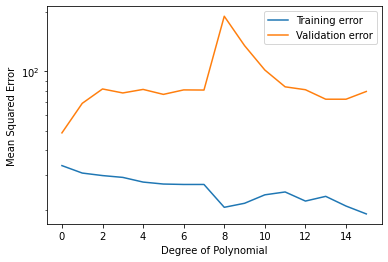

In [9]:
# Plot the errors as a function of increasing d value to visualise the training and testing errors
fig, ax = plt.subplots()
ax.plot(range(maxdeg), training_error, label = 'Training error')
ax.plot(range(maxdeg), validation_error, label = 'Validation error')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_yscale('log')
plt.show()